###actual measurements of the light that comes out of UV projector version 2

#####performed 03 September 2015

In [1]:
import djd.jeti as jeti
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
green = jeti.jetitodict(r'\\Drobo5N\Public\Dan\dome\luminance_uvProjector2\green_set2.csv')
uv = jeti.jetitodict(r'\\Drobo5N\Public\Dan\dome\luminance_uvProjector2\uv_set1.csv')

In [3]:
wavelengths = uv['wavelengths']
contrasts = np.linspace(0,100,11)

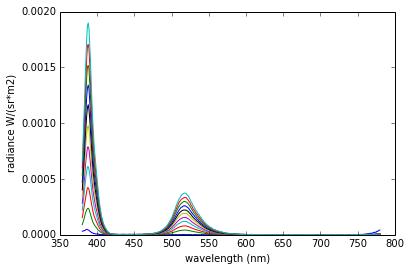

In [4]:
for contrast in contrasts:
    plt.plot(wavelengths,uv['uv_'+str(int(contrast))]+green['green_'+str(int(contrast))])
plt.xlabel('wavelength (nm)')
plt.ylabel('radiance W/(sr*m2)')
f=plt.gcf()
f.savefig(r'\\Drobo5N\Public\Dan\dome\luminance_uvProjector2\luminance_uvProjector2_contrast_spectra.png',format='png')
f.savefig(r'\\Drobo5N\Public\Dan\dome\luminance_uvProjector2\luminance_uvProjector2_contrast_spectra.eps',format='eps')

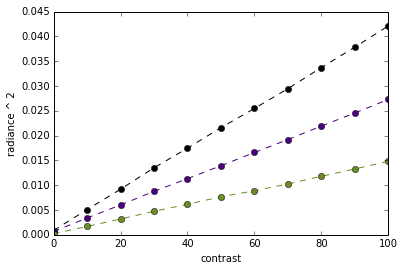

In [5]:
total_irradiance_uv = []
total_irradiance_green = []
total_irradiance = []
for contrast in contrasts:
    both = uv['uv_'+str(int(contrast))]+green['green_'+str(int(contrast))]
    total_irradiance.append(np.trapz(both[:300]))
    total_irradiance_uv.append(np.trapz(uv['uv_'+str(int(contrast))][:300]))
    total_irradiance_green.append(np.trapz(green['green_'+str(int(contrast))][:300]))
plt.plot(contrasts,total_irradiance,'--o',color='k')
plt.plot(contrasts,total_irradiance_uv,'--o',color='#4B0082')
plt.plot(contrasts,total_irradiance_green,'--o',color='#6B8E23')
plt.xlabel('contrast')
plt.ylabel('radiance ^ 2')
f=plt.gcf()
f.savefig(r'\\Drobo5N\Public\Dan\dome\luminance_uvProjector2\luminance_uvProjector2_contrast.png',format='png')
f.savefig(r'\\Drobo5N\Public\Dan\dome\luminance_uvProjector2\luminance_uvProjector2_contrast.eps',format='eps')

In [7]:
wv = np.linspace(350,700,350)
mso = np.zeros(350);mso[:249]=jeti.mso
green_max = np.zeros(350);green_max[30:]=green['green_100'][:320]
uv_max = np.zeros(350);uv_max[30:]=uv['uv_100'][:320]

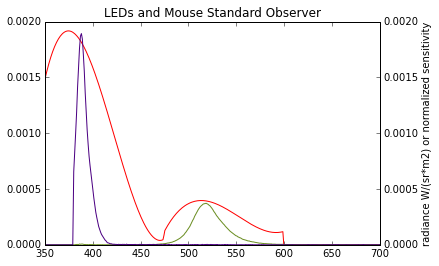

In [9]:
f,ax = plt.subplots(1)
ax.plot(np.linspace(350,700,350),mso/2500,color='r')
axR=ax.twinx()
axR.plot(np.linspace(350,700,350),green_max,color='#6B8E23')
axR.plot(np.linspace(350,700,350),uv_max,color='#4B0082')
plt.xlabel('wavelength (nm)')
plt.ylabel('radiance W/(sr*m2) or normalized sensitivity')
plt.title('LEDs and Mouse Standard Observer')
f=plt.gcf()
f.savefig(r'\\Drobo5N\Public\Dan\dome\luminance_uvProjector2\luminance_uvProjector2_max.png',format='png')
f.savefig(r'\\Drobo5N\Public\Dan\dome\luminance_uvProjector2\luminance_uvProjector2_max.eps',format='eps')

green: 6.31392466128
white: 11.7728662689
0.536311592868  <-- green / UV effectiveness


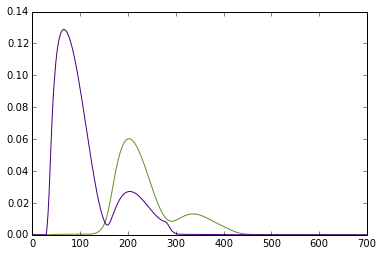

In [70]:
plt.plot(np.convolve(mso,green_max),color='#6B8E23')
plt.plot(np.convolve(mso,uv_max),color='#4B0082')
print 'green: '+str(np.trapz(np.convolve(mso,green_max)))
print 'white: '+str(np.trapz(np.convolve(mso,uv_max)))
print str(np.trapz(np.convolve(mso,green_max))/np.trapz(np.convolve(mso,uv_max)))+'  <-- '+'green / UV effectiveness'